In [25]:
%matplotlib inline 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [26]:
city_data_to_load='weather_data/cities.csv'

In [27]:
city_data_df=pd.read_csv(city_data_to_load)
city_data_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Severo-Kurilsk,RU,2022-03-30 22:06:21,50.6789,156.1250,29.77,75,43,8.41
1,1,Rikitea,PF,2022-03-30 22:06:22,-23.1203,-134.9692,78.94,73,99,17.09
2,2,Saskylakh,RU,2022-03-30 22:06:22,71.9167,114.0833,-5.28,98,100,7.02
3,3,Senador Jose Porfirio,BR,2022-03-30 22:06:23,-2.5908,-51.9542,72.57,99,100,2.86
4,4,Puerto Ayora,EC,2022-03-30 22:06:23,-0.7393,-90.3518,82.36,91,100,4.00
...,...,...,...,...,...,...,...,...,...,...
566,566,Ongandjera,NaN,2022-03-30 22:24:40,-17.8833,15.0667,76.28,52,37,8.43
567,567,Acajutla,SV,2022-03-30 22:24:40,13.5928,-89.8275,85.08,59,100,8.23
568,568,Mirpur Sakro,PK,2022-03-30 22:24:40,24.5474,67.6277,77.88,57,0,8.41
569,569,Pampa,US,2022-03-30 22:24:41,35.5362,-100.9599,54.55,28,100,19.57


In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


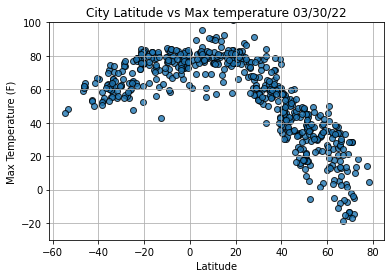

In [33]:
import time

plt.scatter(lats,
           max_temps,
           edgecolor="black",linewidths=1,marker="o",
           alpha=.8,label="Cities")

plt.title(f"City Latitude vs Max temperature " +time.strftime("%x"))

plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(-30,100)


plt.savefig("weather_data/Fig1.png")

plt.show()

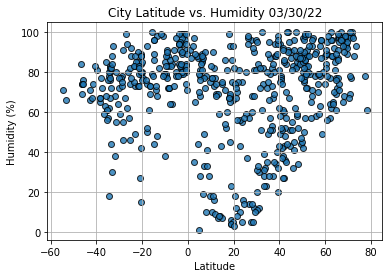

In [34]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

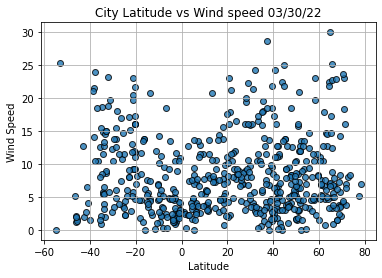

In [39]:
plt.scatter(lats,wind_speed,
           edgecolor="black",marker="o",alpha=0.8,label="cities")

plt.title("City Latitude vs Wind speed " +time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/fig3.png")

plt.show()

In [47]:
# Perform linear regression.
# (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# # Calculate the regression line "y values" from the slope and intercept.
# # regress_values = x_values * slope + intercept

# # Get the equation of the line.
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# # Create a scatter plot of the x and y values.
# plt.scatter(x_values,y_values)
# # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
# plt.plot(x_values,regress_values,"r")
# # Annotate the text for the line equation and add its coordinates.
# plt.annotate(line_eq, (10,40), fontsize=15, color="red")
# plt.title(title)
# plt.xlabel('Latitude')
# plt.ylabel('Temp')
# plt.show()

In [70]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    r=r_value
    print(r)
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [71]:
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"]<0)]

-0.8802085568719599


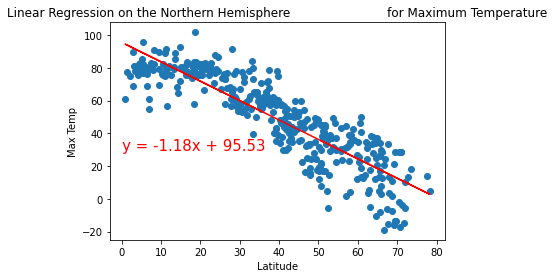

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,30))


0.6366126497922524


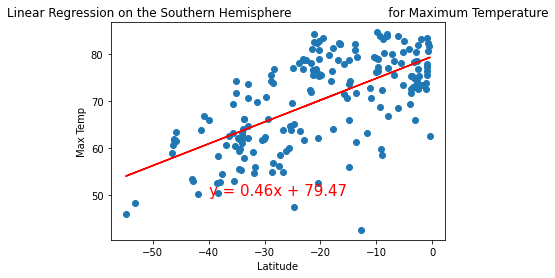

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-40,50))

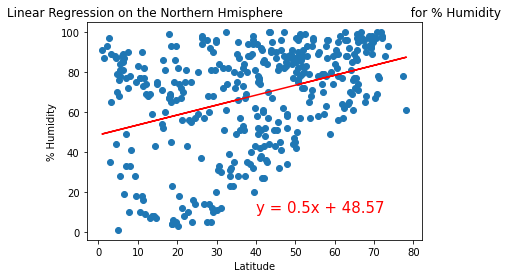

In [64]:
x_values= northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]

plot_linear_regression(x_values,y_values, "Linear Regression on the Northern Hmisphere \
                                for % Humidity", "% Humidity",(40,10))



0.37608836246176974


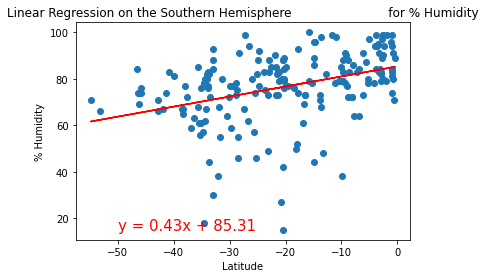

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

0.11615797996602625


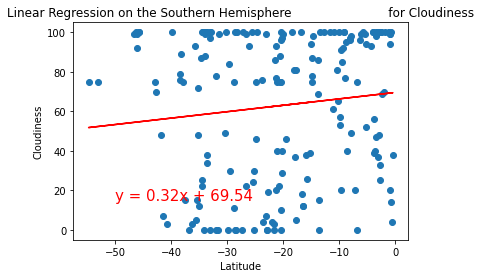

In [75]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Cloudiness', 'Cloudiness',(-50,15))

0.28826567238072714


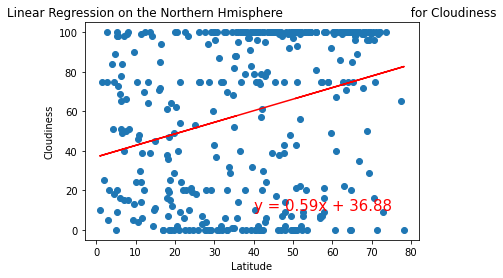

In [76]:
x_values= northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values,y_values, "Linear Regression on the Northern Hmisphere \
                                for Cloudiness", "Cloudiness",(40,10))

0.08617135536452941


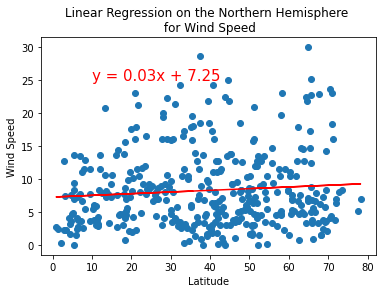

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(10,25))


-0.29012084348420664


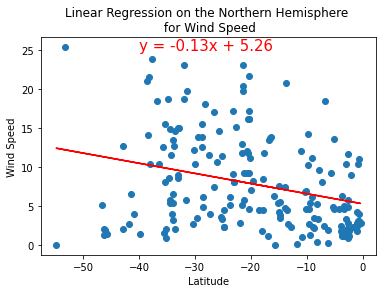

In [81]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(-40,25))
